In [180]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

***EXERCISE 1***

1. Implementation of PCA.

In [50]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.variance = None
        self.mean = None
        self.cumulative_variance = None

    def fit(self, X):
        #we prepare the data by standardizing it
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        #we create the covariance matrix which is need for the eigenvalue decomp
        cov_matrix = np.cov(X.T)

        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        #take the principal components
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        self.components = eigenvectors[idxs][:self.n_components]

        #calculate the variance from each component
        self.variance = eigenvalues[idxs][:self.n_components] / np.sum(eigenvalues)

        #calculate the cumulative variance
        self.cumulative_variance = np.cumsum(self.variance)

    def transform(self, X):
        #dot product the data and the principal components
        X = X - self.mean
        return np.dot(X, self.components.T), self.variance, self.cumulative_variance

The class PCA includes two functions, firstly the .fit() which intakes the data in matrix form, it standardises the data, then it creates a matrix with the covariance which is later used to crate the eigenvalues and eigenvectors. Finally, we obtain the eigenvectors, sort them and obtain the principal components from them. Additionally, we calculate the variance from each component. The second function .transform() intakes the data and projects the principal components onto our data using the dot product, in addition the variance is returned here. 

In [51]:
occu_train = np.loadtxt('OccupancyTrain.csv', delimiter=',')
occu_test = np.loadtxt('OccupancyTest.csv', delimiter=',')

In [52]:
X_occu_train = occu_train[:,:-1]
y_occu_train = occu_train[:,-1]
X_occu_test = occu_test[:,:-1]
y_occu_test = occu_test[:,-1]

In [53]:
weed_train = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
weed_test = np.loadtxt('IDSWeedCropTest.csv', delimiter=',')

In [54]:
X_weed_train = weed_train[:,:-1]
y_weed_train = weed_train[:,-1]
X_weed_test = weed_test[:,:-1]
y_weed_test = weed_test[:,-1]

In [55]:
print(type(occu_train))
occu_train.shape

<class 'numpy.ndarray'>


(600, 6)

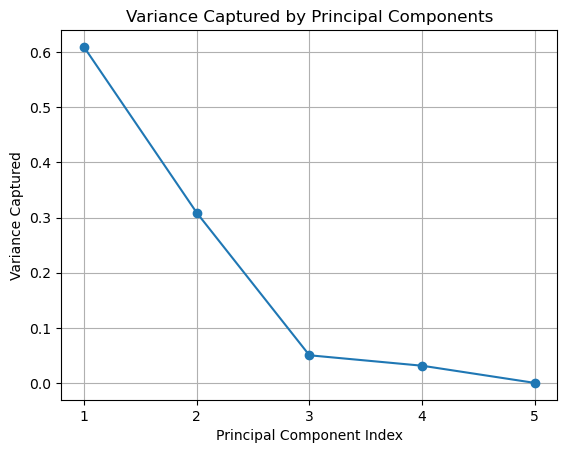

In [56]:
#we normalize the data as asked before applying pca
scaler = StandardScaler()
X_occu_train_scaled = scaler.fit_transform(X_occu_train)

#instantiate pca and fit
pca = PCA(n_components=X_occu_train_scaled.shape[1])
pca.fit(X_occu_train_scaled)

#transform data and obtain variance
X_occu_train_transformed, variance_trained, cumvar_trained = pca.transform(X_occu_train_scaled)

#Plot 
plt.plot(range(1, len(variance_trained) + 1), variance_trained, marker='o', linestyle='-')
plt.xlabel('Principal Component Index')
plt.ylabel('Variance Captured')
plt.title('Variance Captured by Principal Components')
plt.xticks(range(1, len(variance_trained) + 1))
plt.grid(True)
plt.show()

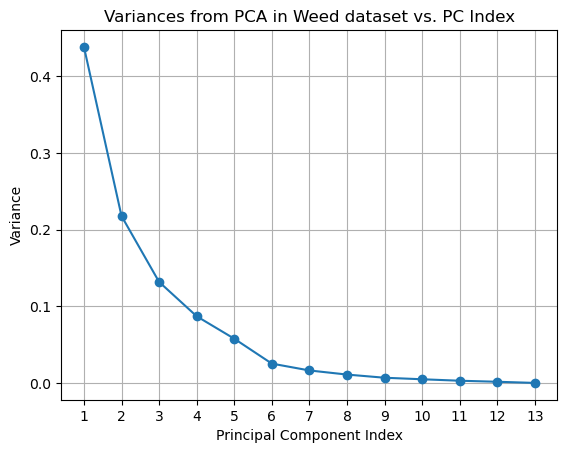

In [57]:
scaler = StandardScaler()
X_weed_train_scaled = scaler.fit_transform(X_weed_train)

#instantiate pca and fit
pca_weed = PCA(X_weed_train_scaled.shape[1])
pca_weed.fit(X_weed_train_scaled)

#transform data and obtain variance
X_weed_train_transformed, weed_variance_trained, cumvar_trained_weed = pca_weed.transform(X_weed_train_scaled)

#Plot variance vs PC index
plt.plot(range(1, len(weed_variance_trained) + 1), weed_variance_trained, marker='o')
plt.xlabel('Principal Component Index')
plt.ylabel('Variance')
plt.title('Variances from PCA in Weed dataset vs. PC Index')
plt.xticks(range(1, len(weed_variance_trained) + 1))
plt.grid(True)
plt.show()

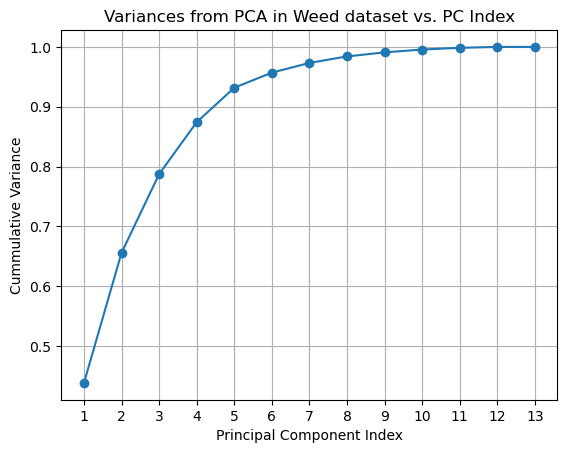

In [58]:
#plot the cumulative variance vs PC index
plt.plot(range(1, len(weed_variance_trained) + 1), cumvar_trained_weed, marker='o')
plt.xlabel('Principal Component Index')
plt.ylabel('Cummulative Variance')
plt.title('Variances from PCA in Weed dataset vs. PC Index')
plt.xticks(range(1, len(weed_variance_trained) + 1))
plt.grid(True)
plt.show()

In [63]:
pcs_for_90 = np.where(cumvar_trained_weed > 0.9)[0] + 1 # +1 because the index starts at 0
pcs_for_95 = np.where(cumvar_trained_weed > 0.95)[0] + 1

print("Number of principal components needed to capture 90% of the variance:", pcs_for_90[0])
print("Number of principal components needed to capture 95% of the variance:", pcs_for_95[0])

Number of principal components needed to capture 90% of the variance: 5
Number of principal components needed to capture 95% of the variance: 6


***EXERCISE 2***

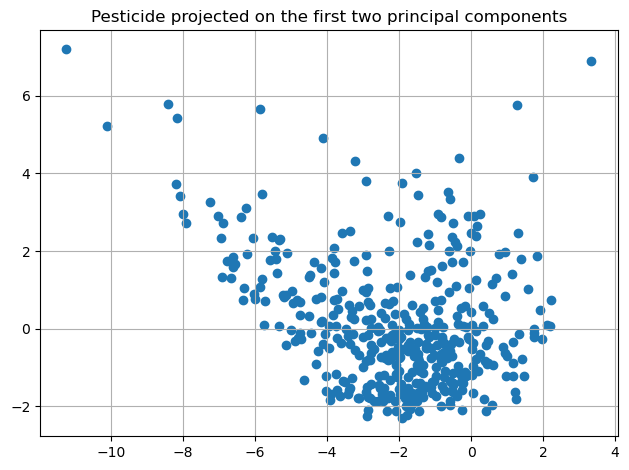

In [100]:
pca_2comp = PCA(n_components=2)
pca_2comp.fit(X_weed_train_scaled)

X_weed_train_transformed_2comp, _ , _ = pca_2comp.transform(X_weed_train_scaled)

plt.scatter(X_weed_train_transformed_2comp[y_weed_train == 0, 0], X_weed_train_transformed_2comp[y_weed_train == 0, 1])
plt.title('Pesticide projected on the first two principal components')
plt.tight_layout()
plt.grid(True)
plt.show()

As my class PCA allows for the selection of the number of components, I just setted it up for 2 components, then fitted the model with the scaled data from the weed dataset. Then after that I used a scatterplot project the Pesticide/weed training dataset onto the first 2 principal components

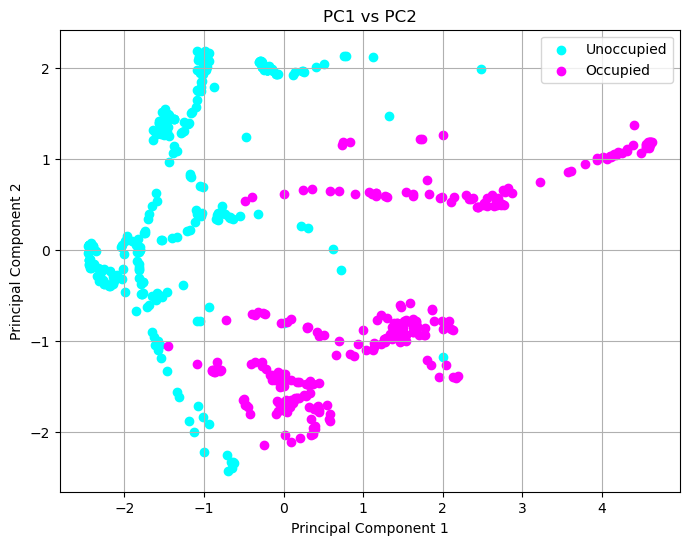

In [95]:
pca_2comp = PCA(n_components=2)
pca_2comp.fit(X_occu_train_scaled)

X_occu_train_transformed_2comp , _ , _ = pca_2comp.transform(X_occu_train_scaled)

plt.figure(figsize=(8, 6))

plt.scatter(X_occu_train_transformed[y_occu_train == 0, 0], 
            X_occu_train_transformed[y_occu_train == 0, 1], 
            label='Unoccupied', color='cyan', alpha=1)

plt.scatter(X_occu_train_transformed[y_occu_train == 1, 0], 
            X_occu_train_transformed[y_occu_train == 1, 1], 
            label='Occupied', color='magenta', alpha=1)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC1 vs PC2')
plt.legend()
plt.grid(True)
plt.show()

***EXERCISE 3***

Both steps like centering and normalization are common methods used in data science. They are meant to standardize the features and bring them to comparable scales which is obviously if not required at least recommendable for PCA.  
To answer the question of whether applying centering and normalization will make a difference. It all depends on the data distribution and scale. In this case we have dataset with data in very different scales.  
  
CENTERING:  
- Centering involves substracting the mean of each feature from the data, shifting the data points so the mean is at the origin. Without this measure, the principal components might be biased towards directions that capture the mean instead of the variance.  

NORMALIZATION:  
- Normalization scales each feature to have unit variance. This is done to ensure that features with larger vairances will not dominate the PCA process, if not done the principal components will obviously be biased due to the unscaled larger variances.

In conclusion I believe that in the current case we are working on, both Centering and Normalization are very much required because as the exercise clarifies the scales of the data are not comparable. If not centered and normalized it will definitely affect the results. Together, centering and normalizing will help in obtaining a more accurate and interpretable principal components that capture the underlying structure of the data. To sum up, we can say that these preprocessing steps are crucial before performing PCA and they ensure that the results are not biased by scalability or distribution of features, allowing for more meaningful and interpretable principal components.  

***EXERCISE 4***

Learning rate: 0.1, ITERS: 69, Minimum: nan
Learning rate: 0.01, ITERS: 105, Minimum: 0.024693232312567183
Learning rate: 0.001, ITERS: 1160, Minimum: 0.024693232313839686
Learning rate: 0.0001, ITERS: 10000, Minimum: 0.024693233808097063


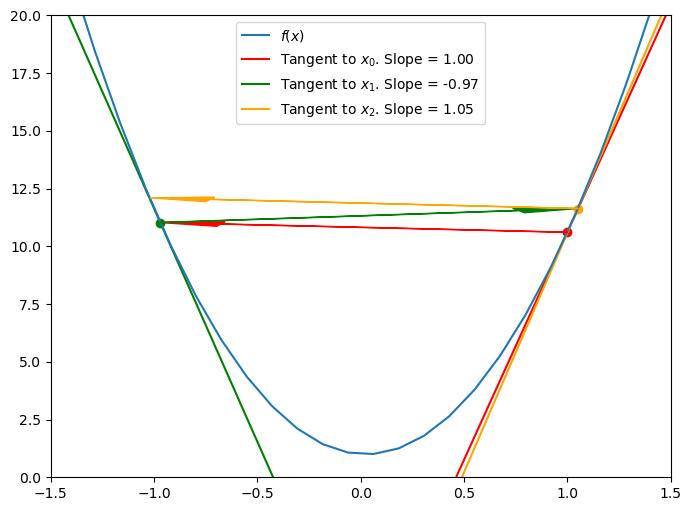

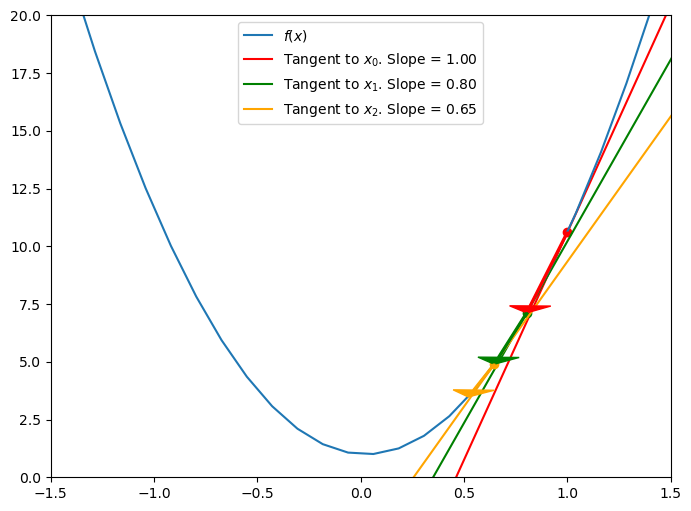

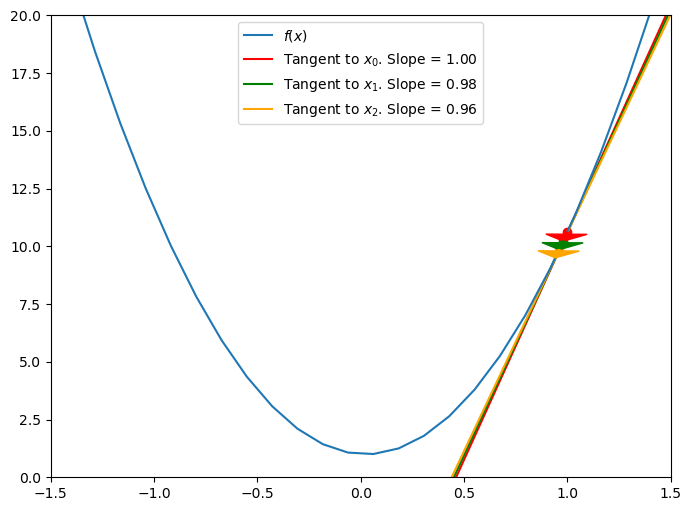

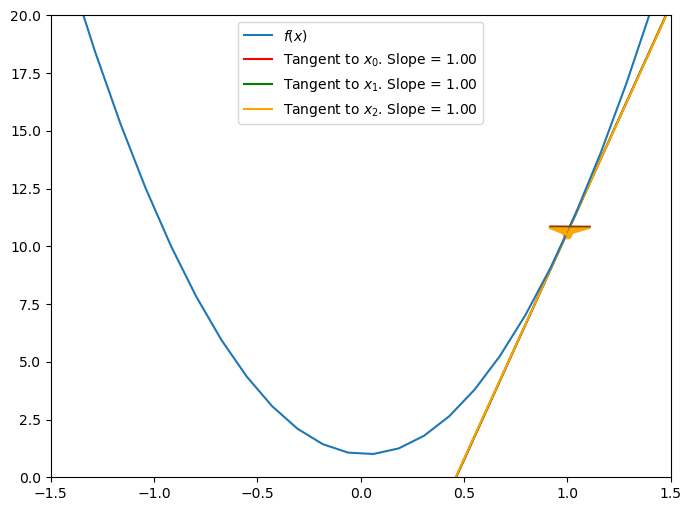

In [192]:
def f(x):
    return np.exp(-x/2) + 10*x**2

def fprime(x):
    return 20*x - (np.exp(-x/2))/2

def gradient_descent(learning_rate, max_iter=10000, x0=1):
    xk = x0
    iter = 0
    xs = [x0]


    while max_iter > iter and np.absolute(fprime(xk)) > 10e-10:
        
        gradient = fprime(xk)
        xk = xk - (gradient * learning_rate)
        iter += 1
        xs.append(xk)

    return {'x':xk, 'iters':iter, 'xs':xs}

learning_rates = [0.1, 0.01, 0.001, 0.0001]

colors = ['red', 'green', 'orange']

for learning_rate in learning_rates:

    res = gradient_descent(learning_rate)
    plt.figure(figsize=(8,6))
    plt.plot(np.linspace(-3,3), f(np.linspace(-3,3)), label='$f(x)$')

    print('Learning rate: ' + str(learning_rate) + ', ITERS: ' + str(res['iters']) + ', Minimum: ' + str(res['x']))

    for i, x in enumerate(res['xs'][:3]):
        linspace = np.linspace(-100, 100)
        plt.plot(linspace, fprime(x)*(linspace - x) + f(x), label=f'Tangent to $x_'+str(i)+f'$. Slope = {x:.2f}', color=colors[i], zorder=1)
        plt.scatter(x, f(x), color=colors[i], zorder=1)

    for i, x in enumerate(res['xs'][:3]):
        plt.arrow(x, f(x), res['xs'][i+1] - x, f(res['xs'][i+1]) - f(x), width=0.01, length_includes_head=True, zorder=2, head_width=0.2, color=colors[i])
    plt.legend()
        
    plt.xlim((-1.5, 1.5))
    plt.ylim((0, 20))

As we can see in the plots above, in between the four learning rates the one that significantly aproximates to the convergeance is $0.01$, the first one (with a lr = $0.1$) has a erratic behaviour and instead of converging it diverges going towards infinity as it can be seen by the value 'nan' in the print statement above the plots, the second one presents a promising descent in the function with a learning rate of $0.01$ and a slope in the third iteration of $0.65$ nearing the perfect $0$ that we are looking for, the third and fourth learning rates present clear diminishing returns as the step gets smaller and smaller, as it can be observed in the last two plots.

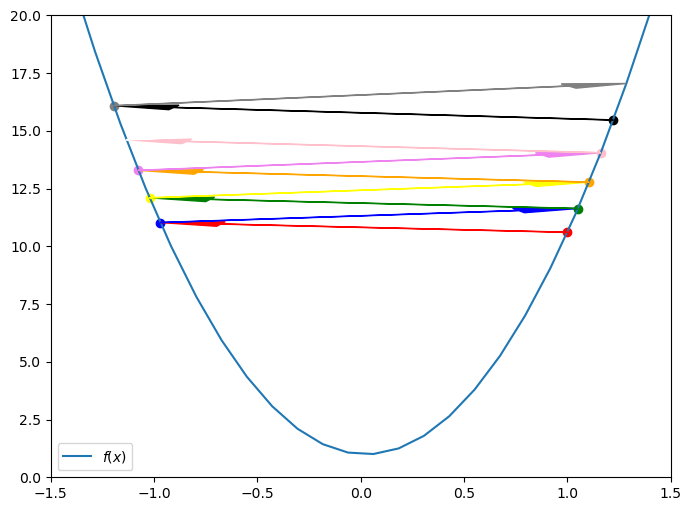

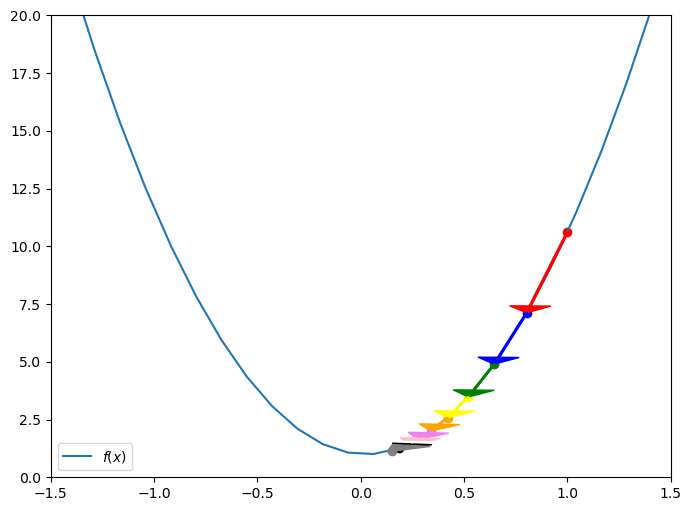

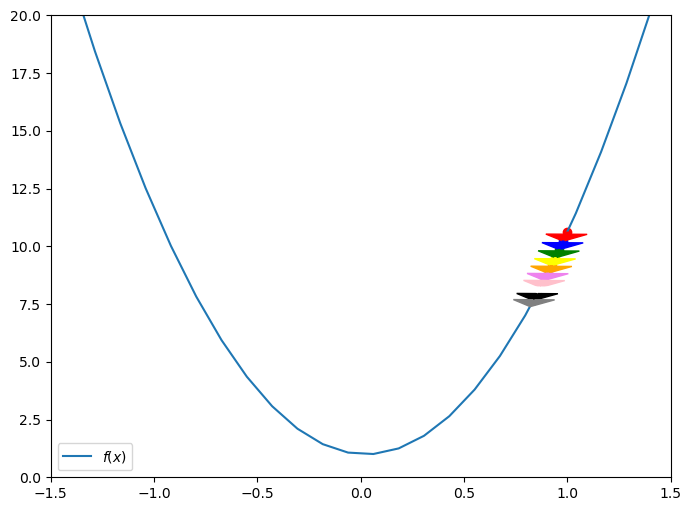

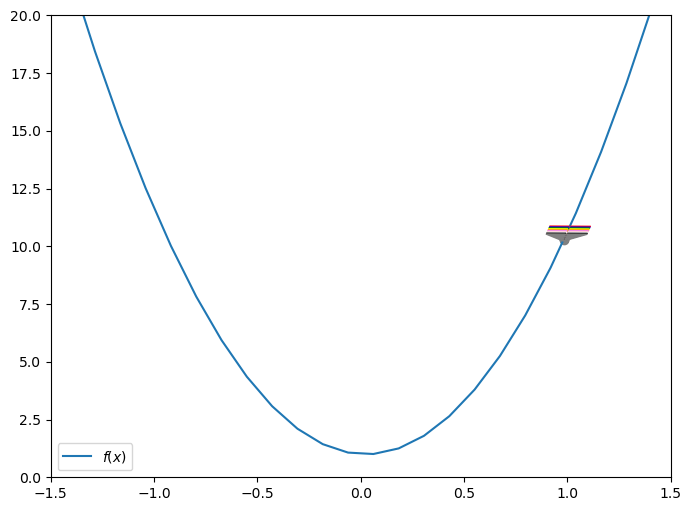

In [188]:
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'violet', 'pink', 'white', 'black', 'gray']

for learning_rate in learning_rates:

    res = gradient_descent(learning_rate)
    plt.figure(figsize=(8,6))
    plt.plot(np.linspace(-3,3), f(np.linspace(-3,3)), label='$f(x)$')

    for i, x in enumerate(res['xs'][:10]):
        plt.scatter(x, f(x), color=colors[i], zorder=1)
        plt.arrow(x, f(x), res['xs'][i+1] - x, f(res['xs'][i+1]) - f(x), width=0.01, length_includes_head=True, zorder=2, head_width=0.2, color=colors[i])
    plt.legend()
        
    plt.xlim((-1.5, 1.5))
    plt.ylim((0, 20))

As we were thinking, the addition of more steps helps to further consolidate our conclusions in the paragraph before. The learning rate $0.01$ approximates to the threshold of $10^{-10}$ in the least number of iterations ($105$) compared to the others. Therefore we can say that the preferable learning rate for the gradient descent of this function is $0.01$.

***EXERCISE 5***

In [226]:
from sklearn.linear_model import LinearRegression

occu_train = scaler.fit_transform(occu_train)
y_occu_train = occu_train[:,0]

lr1 = LinearRegression()
lr1.fit(occu_train[:,1].reshape(-1, 1), y_occu_train)

print('Value for w0 (intercept): '+str(lr1.intercept_)+', Value for w1 (relative humidity): '+str(lr1.coef_[0]))

lr2 = LinearRegression()
lr2.fit(occu_train[:,1:4], y_occu_train)

for value, name in zip(lr2.coef_, ['w1','w2', 'w3']):
    print('Value for '+name+': '+str(value))

Value for w0 (intercept): 9.747727628622879e-17, Value for w1 (relative humidity): -0.009387889127335899
Value for w1: -0.36010666903784716
Value for w2: 0.4140816996134955
Value for w3: 0.544926298908682


In this exercise we used the implementaion by scikit-learn. The parameters $w0$ & $w1$ are printed above, and it can be seen as how the relative humidity plays a relatively lesser role when using it alone as a feature to predict temperature. As for the $wi$ values when using the three features, an increase in the relative humidity is correlated with a decrease in the temperature, an increase in light is correlated with an increase in temperature and finally an increase in CO2 is also correlated with an increase in the temperature. To sum up we can see how the model with three features fitted is much better at prediciting temperature based on the features than the model with only one feature (relative humidity).

***EXERCISE 6***

In [232]:
from sklearn.metrics import root_mean_squared_error
y_true = y_occu_train
y_pred = lr1.predict(occu_train[:,1].reshape(-1, 1))

print('RMSE for model with 1 feature (Relative Humidity): '+str(root_mean_squared_error(y_true, y_pred)))

y_true = y_occu_train
y_pred = lr2.predict(occu_train[:,1:4])

print('RMSE for model with 3 features: '+str(root_mean_squared_error(y_true, y_pred)))


RMSE for model with 1 feature (Relative Humidity): 0.9999559327979076
RMSE for model with 3 features: 0.5871098459314787


RMSE reports back what we concluded in the exercise before. When the model is fitted with three features it is greater at predicting data with a much lesser root mean squared error, although not perfect but comparatively better.

***REFERENCES***  
- GitHub Copilot v1.174.0 was used as assistance while developing the code for this assignment.